In [10]:
import numpy as np
from scipy.spatial.distance import squareform, pdist

import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import _joint_probabilities, _kl_divergence

from matplotlib import pyplot as plt

import seaborn as sns

In [4]:
digits = load_digits()

In [5]:
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

In [6]:
def _joint_probabilities_constant_sigma(D, sigma):
    P = np.exp(-D**2/2 * sigma**2)
    P /= np.sum(P, axis=1)
    return P

In [7]:
# Pairwise distances between all data points.
D = pairwise_distances(X, squared=True)
# Similarity with constant sigma.
P_constant = _joint_probabilities_constant_sigma(D, .002)
# Similarity with variable sigma.
P_binary = _joint_probabilities(D, 30., False)
# The output of this function needs to be reshaped to a square matrix.
P_binary_s = squareform(P_binary)

In [8]:
P_binary_s

array([[0.00000000e+00, 1.19801517e-06, 1.38955209e-07, ...,
        5.50852003e-10, 6.88548428e-10, 2.83257302e-08],
       [1.19801517e-06, 0.00000000e+00, 7.67313046e-06, ...,
        4.96794925e-11, 6.56112435e-11, 4.44248128e-09],
       [1.38955209e-07, 7.67313046e-06, 0.00000000e+00, ...,
        1.33170091e-09, 4.31192941e-10, 5.40714872e-08],
       ...,
       [5.50852003e-10, 4.96794925e-11, 1.33170091e-09, ...,
        0.00000000e+00, 6.17301371e-06, 4.82067182e-07],
       [6.88548428e-10, 6.56112435e-11, 4.31192941e-10, ...,
        6.17301371e-06, 0.00000000e+00, 1.92106529e-05],
       [2.83257302e-08, 4.44248128e-09, 5.40714872e-08, ...,
        4.82067182e-07, 1.92106529e-05, 0.00000000e+00]])

Text(0.5, 1.0, '$p_{j|i}$ (variable $\\sigma$)')

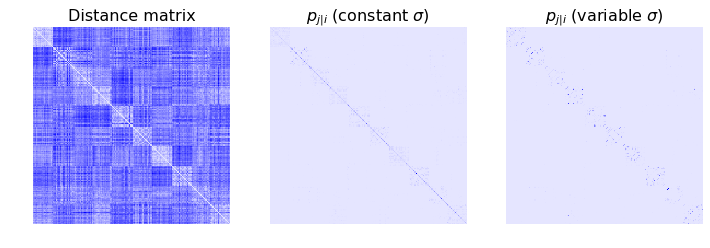

In [12]:
plt.figure(figsize=(12, 4))
pal = sns.light_palette("blue", as_cmap=True)

plt.subplot(131)
plt.imshow(D[::10, ::10], interpolation='none', cmap=pal)
plt.axis('off')
plt.title("Distance matrix", fontdict={'fontsize': 16})

plt.subplot(132)
plt.imshow(P_constant[::10, ::10], interpolation='none', cmap=pal)
plt.axis('off')
plt.title("$p_{j|i}$ (constant $\sigma$)", fontdict={'fontsize': 16})

plt.subplot(133)
plt.imshow(P_binary_s[::10, ::10], interpolation='none', cmap=pal)
plt.axis('off')
plt.title("$p_{j|i}$ (variable $\sigma$)", fontdict={'fontsize': 16})